In [3]:
import numpy as np
import pandas as pd
import pyflux as pf
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt


def convert(dataframe):
    l = []
    for i in dataframe:
        c = str(i).split("..")
        f = ""
        if(c[0][0] == "."):
            f += c[0][1:]
        else:
            f += c[0]
        if(len(c)>1):
            f+="."+c[1][:-1]
        l.append(float(f))
    return l

data = pd.read_csv("/home/nishant/Downloads/merge_oil.csv")
data.index = pd.to_datetime(data["Date"],format="%Y-%m-%d")
data = data.drop(['Date'],axis=1)


data["IOC_Open"] = convert(data["IOC_Open"])
data["IOC_High"] = convert(data["IOC_High"])
data["IOC_Low"] = convert(data["IOC_Low"])
data["IOC_Close"] = convert(data["IOC_Close"])

data["ONGC_Open"] = convert(data["ONGC_Open"])
data["ONGC_High"] = convert(data["ONGC_High"])
data["ONGC_Low"] = convert(data["ONGC_Low"])
data["ONGC_Close"] = convert(data["ONGC_Close"])

data["TCI_Open"] = convert(data["TCI_Open"])
data["TCI_High"] = convert(data["TCI_High"])
data["TCI_Low"] = convert(data["TCI_Low"])
data["TCI_Close"] = convert(data["TCI_Close"])

split = int(0.8 * len(data))
training_data = data[:split]
test_data = data[split:]





In [4]:
l = list(training_data.columns)
n = len(l)


'''for i in range(1,n):
    print(l[i])
    print(adfuller(data[l[i]])[1]) '''

    
#hence removing percent_change from the analysis because of possible order difference (bias)
#make dollar_eq,price,open,high,low,volume stationary

#data["Dollar_eq"] = data["Dollar_eq"].diff()[1:]
#print(adfuller(data["Dollar_eq"])[1])
#diff_dollar_eq = training_data["Dollar_eq"].diff()[1:]
#print(adfuller(diff_dollar_eq)[1])
#diff_price = training_data["Price"].diff()[1:]
#print(adfuller(diff_price)[1])
#diff_open = training_data["Open"].diff()[1:]
#print(adfuller(diff_open)[1])
#diff_high = training_data["High"].diff()[1:]
#print(adfuller(diff_high)[1])
#diff_low = training_data["Low"].diff()[1:]
#print(adfuller(diff_low)[1])
#diff_volume = training_data["Volume"].diff()[1:]
#print(adfuller(diff_volume)[1]) 

#ARMAX for IOC_Open
#make IOC_Open stationary

print(adfuller(training_data["IOC_Open"])[1])
print(adfuller(training_data["IOC_High"])[1])
print(adfuller(training_data["IOC_Low"])[1])
print(adfuller(training_data["IOC_Close"])[1])
#print(training_data["IOC_Close"].plot())

diff_ioc_open = training_data["IOC_Open"].diff()[1:]
diff_ioc_high = training_data["IOC_High"].diff()[1:]
diff_ioc_low = training_data["IOC_Low"].diff()[1:]
diff_ioc_close = training_data["IOC_Close"].diff()[1:]



print(adfuller(training_data["ONGC_Open"])[1])
print(adfuller(training_data["ONGC_High"])[1])
print(adfuller(training_data["ONGC_Low"])[1])
print(adfuller(training_data["ONGC_Close"])[1])
#print(training_data["ONGC_Close"].plot())

diff_ongc_open = training_data["ONGC_Open"].diff()[1:]
diff_ongc_high = training_data["ONGC_High"].diff()[1:]
diff_ongc_low = training_data["ONGC_Low"].diff()[1:]
diff_ongc_close = training_data["ONGC_Close"].diff()[1:]


print(adfuller(training_data["TCI_Open"])[1])
print(adfuller(training_data["TCI_High"])[1])
print(adfuller(training_data["TCI_Low"])[1])
print(adfuller(training_data["TCI_Close"])[1])
#print(training_data["TCI_Close"].plot())

diff_tci_open = training_data["TCI_Open"].diff()[1:]
diff_tci_high = training_data["TCI_High"].diff()[1:]
diff_tci_low = training_data["TCI_Low"].diff()[1:]
diff_tci_close = training_data["TCI_Close"].diff()[1:]



print(adfuller(diff_ioc_open)[1])
print(adfuller(diff_ioc_high)[1])
print(adfuller(diff_ioc_low)[1])
print(adfuller(diff_ioc_close)[1])
#print(diff_ioc_close.plot())

print(adfuller(diff_ongc_open)[1])
print(adfuller(diff_ongc_high)[1])
print(adfuller(diff_ongc_low)[1])
print(adfuller(diff_ongc_close)[1])
#print(diff_ongc_close.plot())

print(adfuller(diff_tci_open)[1])
print(adfuller(diff_tci_high)[1])
print(adfuller(diff_tci_low)[1])
print(adfuller(diff_tci_close)[1])
#print(diff_tci_close.plot()) 








'''
IOC_Open
0.8002719134424383
IOC_High
0.7929649906307306
IOC_Low
0.8029500063118031
IOC_Close
0.8039473147230245
ONGC_Open
0.2742350667014256
ONGC_High
0.2469060046476632
ONGC_Low
0.28255038008874644
ONGC_Close
0.2690677416186882
TCI_Open
0.6197477341099538
TCI_High
0.5681508146555672
TCI_Low
0.6252814709902863
TCI_Close
0.6522010507098521
'''


0.9990410289044603
0.9986904991334106
0.9986961848979752
0.9988699031482736
0.3783545786701893
0.34959484239896105
0.37417511329109654
0.4057938385530435
0.5614986355311959
0.5518971449077584
0.6026590896103907
0.6280993689484832
3.0931979084324334e-15
0.0
3.9676269271623017e-22
0.0
6.907525780729567e-14
0.0
0.0
0.0
5.6951097480746595e-18
0.0
0.0
0.0


'\nIOC_Open\n0.8002719134424383\nIOC_High\n0.7929649906307306\nIOC_Low\n0.8029500063118031\nIOC_Close\n0.8039473147230245\nONGC_Open\n0.2742350667014256\nONGC_High\n0.2469060046476632\nONGC_Low\n0.28255038008874644\nONGC_Close\n0.2690677416186882\nTCI_Open\n0.6197477341099538\nTCI_High\n0.5681508146555672\nTCI_Low\n0.6252814709902863\nTCI_Close\n0.6522010507098521\n'

In [5]:
#print(len(diff_open))
#print(len(diff_high))
#print(len(diff_low))
#print(len(diff_volume))
#print(len(diff_ioc_open))

#ex = pd.concat([diff_price],axis=1)
#ex 
#ex = pd.concat([training_data["Price"]],axis=1)
#ex_ongc = pd.concat([diff_ongc_open,diff_ongc_high,diff_ongc_low],axis=1)
#print(ex_ongc)
ex_tci = pd.concat([diff_tci_open,diff_tci_high,diff_ioc_low],axis=1)
print(ex_tci)
#ex_ioc = pd.concat([diff_ioc_open,diff_ioc_high,diff_ioc_low],axis=1)
#print(ex_ioc)

            TCI_Open  TCI_High   IOC_Low
Date                                    
2011-12-13 -2.099998 -1.600003 -0.312500
2011-12-14  0.599998 -0.349998  0.675004
2011-12-15  0.000000  0.000000 -0.500000
2011-12-16  0.000000  0.500000 -0.849999
2011-12-19 -3.099998 -2.500000 -0.237503
2011-12-20 -2.400002  0.000000 -0.250000
2011-12-21  0.599998 -0.549999  0.699997
2011-12-22 -1.099998 -2.000000  0.887505
2011-12-23  3.500000  4.000000  0.887496
2011-12-27  0.000000 -1.950001 -2.650001
2011-12-28 -1.500000  0.400002 -1.987495
2011-12-29 -1.349998 -1.500000 -0.900002
2011-12-30  2.649997  0.899997  0.637501
2012-01-03 -1.799999  2.950001 -0.875000
2012-01-04  1.099998  1.950001  0.087497
2012-01-05  1.250000 -4.350003  0.700001
2012-01-06 -0.750000  1.600003  0.225003
2012-01-09  4.900002  2.549999 -0.400002
2012-01-10 -2.450001  0.250000  1.375000
2012-01-11  0.000000  4.099998  0.125000
2012-01-12  6.750004 -0.049995  2.025002
2012-01-13  3.000000  3.000000  0.525001
2012-01-17 -5.85

/usr/local/lib/python2.7/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:              TCI_Close   No. Observations:                 1325
Model:                     ARMA(4, 4)   Log Likelihood               -3432.231
Method:                       css-mle   S.D. of innovations              3.225
Date:                Thu, 22 Nov 2018   AIC                           6890.461
Time:                        10:56:11   BIC                           6957.921
Sample:                             0   HQIC                          6915.748
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0008      0.010     -0.078      0.938      -0.021       0.020
TCI_Open           -0.0249      0.021     -1.162      0.245      -0.067       0.017
TCI_High            0.9579      

0.8444991967213102

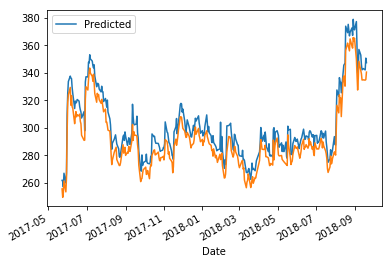

In [10]:
#find p and q for ARMAX

#pacf for p
#plot_pacf(diff_ongc_close,lags=100) 
#plot_acf(diff_ongc_close,lags=100) 
#plot_pacf(training_data["ONGC_Close"],lags=50) 
#plot_acf(training_data["ONGC_Close"],lags=50) 

#plot_pacf(diff_ioc_close,lags=50) 
#plot_acf(diff_ioc_close,lags=50) 
#plot_pacf(training_data["IOC_Close"],lags=50) 
#plot_acf(training_data["IOC_Close"],lags=50) 

#plot_pacf(diff_tci_close,lags=50) 
#plot_acf(diff_tci_close,lags=50) 
#plot_pacf(training_data["TCI_Close"],lags=50) 
#plot_acf(training_data["TCI_Close"],lags=50) 

'''
#           FORECAST ONGC
from sklearn.metrics import r2_score

model = ARIMA(diff_ongc_close,order=(3,0,3),exog=ex_ongc)
model_fit = model.fit(disp=0)

test_exog = pd.concat([test_data["ONGC_Open"],test_data["ONGC_High"],test_data["ONGC_Low"]],axis=1)

forecast = model_fit.forecast(steps=len(test_data),exog=test_exog)[0]
f = []
for yhat in forecast:
    f.append(yhat)


    
    
#print(history)

rms = sqrt(mean_squared_error(list(test_data["ONGC_Close"]), f))
predicted_ongc = pd.DataFrame({'Predicted':f})
predicted_ongc.index = test_data.index
#print(list(predicted_ongc["Predicted"]))
#print(list(test_data["ONGC_Close"]))
#print(test_data["IOC_Close"].plot())
#test_data["ONGC_Close"].plot()
#predicted_ongc.plot()
#print(rms)'''



#           FORECAST IOC
'''
model = ARIMA(diff_ioc_close,order=(7,0,7),exog=ex_ioc)
model_fit = model.fit(disp=0)

test_exog = pd.concat([test_data["IOC_Open"],test_data["IOC_High"],test_data["IOC_Low"]],axis=1)

forecast = model_fit.forecast(steps=len(test_data),exog=test_exog)[0]
f = []
for yhat in forecast:
    f.append(yhat)


    
    

rms = sqrt(mean_squared_error(list(test_data["IOC_Close"]), f))
predicted_ioc = pd.DataFrame({'Predicted':f})
predicted_ioc.index = test_data.index
#print(list(predicted_ioc["Predicted"]))
#print(list(test_data["IOC_Close"]))
#print(test_data["IOC_Close"].plot())
#test_data["IOC_Close"].plot() '''
#predicted_ioc.plot()
#print(rms)



#           FORECAST TCI

model = ARIMA(diff_tci_close,order=(4,0,4),exog=ex_tci)
#model.plot_diagnostics()

model_fit = model.fit(disp=0)
print(model_fit.summary())
#model_fit.plot_diagnostics()
#plt.plot()

test_exog = pd.concat([test_data["TCI_Open"],test_data["TCI_High"],test_data["TCI_Low"]],axis=1)

forecast = model_fit.forecast(steps=len(test_data),exog=test_exog)[0]

f = []
for yhat in forecast:
    f.append(yhat)


    
    
#print(history)
from sklearn.metrics import r2_score
rms = sqrt(mean_squared_error(list(test_data["TCI_Close"]), f))
predicted_tci = pd.DataFrame({'Predicted':f})
predicted_tci.index = test_data.index
#print(list(predicted_tci["Predicted"]))
#print(test_data["IOC_Close"].plot())
#test_data["IOC_Close"].plot()
print(predicted_tci.plot())
print(test_data["TCI_Close"].plot())
#print(list(test_data["TCI_Close"]))
print(rms)
r2_score(f,list(test_data["TCI_Close"]))


#print(list(predicted_ioc["Predicted"]))
#print(test_data["IOC_Close"].plot())
#print(predicted_ioc.plot())
#print(test_data["TCI_Close"].plot())
#print(predicted_tci.plot())








